# Classify the Galaxies

## Set Up

In [44]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano

import sys

from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# input image dimensions
img_rows, img_cols = 300, 300

# number of channels
img_channels = 1


In [6]:
#%%
#  data

## Create DataFrame of Images

### Verify Can Load Images

In [15]:
path1 = 'data/galaxytrain'    #path of folder of images    
path2 = 'data/galaxyprocess'  #path of folder to save images   

In [16]:
listing = os.listdir(path1) 
num_samples=size(listing)
print (num_samples)

400


### Create Image DataFrames

#### IMPORTANT!!!! Change directory to full subset when not testing

In [22]:
for file in listing:
    im = Image.open(path1 + '/' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here           
    gray.save(path2 +'/' +  file, "JPEG")

In [23]:
imlist = os.listdir(path2)

In [25]:
im1 = array(Image.open('data/galaxyprocess' + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

In [28]:
m

300

In [26]:
# create matrix to store all flattened images
immatrix = array([array(Image.open('data/galaxyprocess'+ '/' + im2)).flatten()
              for im2 in imlist],'f')

In [29]:
label=np.ones((num_samples,),dtype = int)
label[0:101]=0
label[101:201]=1
label[201:301]=2
label[301:]=3

In [31]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

(400, 90000)
(400,)


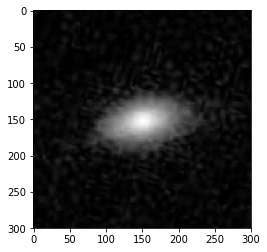

In [32]:
img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

## Train the Model

In [33]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 4
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [34]:
(X, y) = (train_data[0],train_data[1])

In [35]:
# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [36]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [38]:
X_train /= 400
X_test /= 400

In [39]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (320, 1, 300, 300)
320 train samples
80 test samples


In [40]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

label :  [0. 0. 1. 0.]


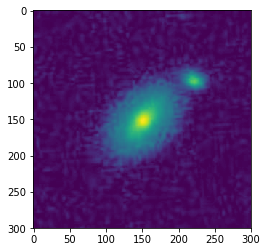

In [41]:
i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])


In [58]:
model = Sequential()

#model.add(Convolution2D(nb_filters, (nb_conv, nb_conv),
                       # input_shape=(1, img_rows, img_cols),padding="valid"))
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,img_rows,img_cols), data_format='channels_first'))
                

convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, (nb_conv, nb_conv)))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [60]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
               verbose=1, validation_data=(X_test, Y_test))
            
            
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
               verbose=1, validation_split=0.2)


Train on 320 samples, validate on 80 samples
Epoch 1/20
320/320 [==============================] - 231s 721ms/step - loss: 1.4047 - val_loss: 1.3855
Epoch 2/20
128/320 [===========>..................] - ETA: 2:00 - loss: 1.3783

KeyboardInterrupt: 